# PCA

Goals:
- calcualte the initial variance on toy 2d dataset
- hand-code the PCA algorithm to reduce the dataset to 1 dimension
- calcualte the variance of a reduced dataset

## Import basic libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## Create a toy dataset

In [2]:
N = 100
D = 2

# data along x axis is normally distributed with mean data_mu and variance data_sigma
data_mu = 2.5
data_sigma = 3.0

# data along y axis has a true relation to x as y = k * x, 
# except for the measurement error
k = 2.5

# error is normally distributed random variable with mean err_mu and variance err_sigma
# that is, the error is sum of many different random influences
err_mu = 0
err_sigma = 1.5

# make up the dataset
data = np.empty([N, D], dtype=float)
data[:, 0] = data_sigma * np.random.randn(N) + data_mu
data[:, 1] = err_sigma * np.random.randn(N) + err_mu # errors
data[:, 1] = data[:, 0] * k + data[:, 1]

# peek into the dataset
data[:5]

array([[ 5.49819804, 13.23551867],
       [ 3.12081823,  6.96278967],
       [ 4.85927408, 11.66411915],
       [ 4.83168255, 13.34882128],
       [-2.11881895, -5.70526661]])

## Plot the toy dataset

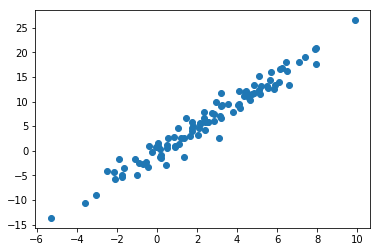

In [3]:
plt.scatter(data[:, 0], data[:, 1])

## Prepare the data

### Zero-center

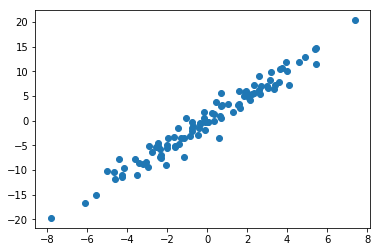

In [4]:
data[:, 0] = data[:, 0] - np.mean(data[:, 0])
data[:, 1] = data[:, 1] - np.mean(data[:, 1])
plt.scatter(data[:, 0], data[:, 1])

### Scale

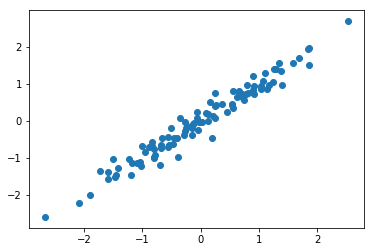

In [5]:
data[:, 0] = data[:, 0] / np.std(data[:, 0])
data[:, 1] = data[:, 1] / np.std(data[:, 1])
plt.scatter(data[:, 0], data[:, 1])

## Calculate variance

In [6]:
np.var(data[:, 0]), np.var(data[:, 1])

(0.9999999999999999, 0.9999999999999999)

## PCA

In [7]:
# calculate the covariance matrix
covariance_matrix = data.T.dot(data)
covariance_matrix[:5]

array([[100.        ,  97.83960949],
       [ 97.83960949, 100.        ]])

In [8]:
# calculate eigenvectors for the covariance matrix
w, v = np.linalg.eig(covariance_matrix)
w, v

(array([197.83960949,   2.16039051]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [9]:
# get the eigenvector sorted
eig = v[np.argsort(w)]
eig

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [10]:
# transform the data by calculating the projection on eigenvectors
data1 = data.dot(eig)

## Calculate the new variance

In [11]:
new_var = np.var(data1[:, 0]), np.var(data1[:, 1])
new_var

(1.978396094903176, 0.02160390509682361)

## Plot the new dataset

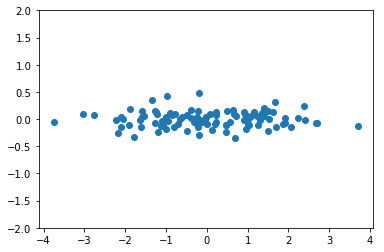

In [12]:
axes = plt.gca()
axes.set_ylim([-2.0, 2.0])

x = data1[:, np.argmax(new_var)]
y = data1[:, np.argmin(new_var)]

plt.scatter(x, y)

## Drop dimension

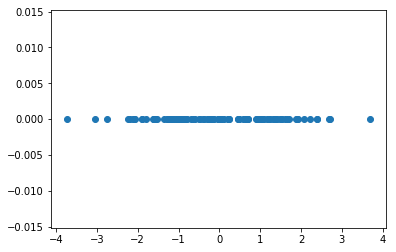

In [13]:
plt.scatter(data1[:, np.argmax(new_var)], np.zeros(N))

## Conclusions

By applying the PCA algorithm, the initial 2d dataset could be reduced to a single dimension dataset, while retaining most of the variance